## 1. Load the Tweets Dataset

In [2]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)

In [3]:
tweets = pd.read_csv("tweets.csv")
tweets.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [5]:
tweets.shape

(7920, 3)

In [4]:
### 0 refers to Positive sentiment, 1 is negative sentiment

In [6]:
# LEt's map 0 as 1, and 1 as 0
tweets['label'] = tweets['label'].map({0: 1, 1: 0})
tweets.head()

,id,label,tweet
0,1,1,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,1,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,1,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,1,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


## 2. Basic Exploratory Data Analyses

In [8]:
# check for missing values 
tweets.isnull().sum()  # sum of the null values in each col

id       0
label    0
tweet    0
dtype: int64

In [ ]:
# drop the id column
tweets.drop("id", axis=1, inplace=True)

In [13]:
tweets.head()

,label,tweet
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,1,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,1,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,1,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [15]:
# check for class balance
tweets["label"].value_counts(normalize=True)

1    0.744192
0    0.255808
Name: label, dtype: float64

<Axes: >

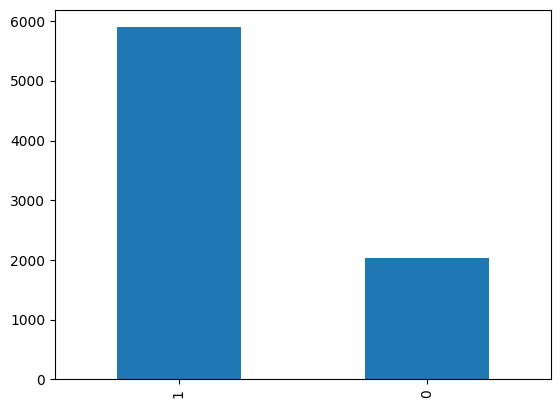

In [16]:
# plot the label counts
tweets["label"].value_counts().plot(kind='bar')

<Axes: xlabel='label', ylabel='count'>

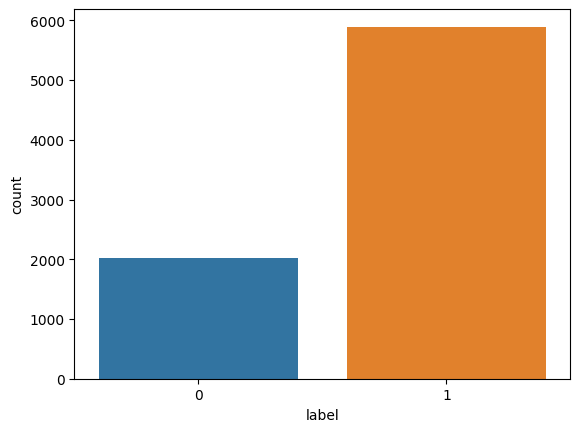

In [18]:
import seaborn as sns
sns.countplot(data=tweets,x='label')

## 3. Data Cleaning

In [22]:
tweets["tweet"][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [23]:
import re

In [25]:
# LEt's substitute 's with "is"
re.sub(r"'s\b", " is", tweets["tweet"][24])

# re.sub(pattern_to_be_matched, replacement_pattern, string_on_which_it_will_apply)
# "r" at the start >> deonotes raw string
# searching for contractions >> 's
# \b >>> word boundary in regex >> ensures that "'s" is at the end of the word.

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [26]:
tweets["tweet"][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [27]:
# Remove the user mentions
re.sub("@[A-Za-z0-9]+", "", tweets["tweet"][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [30]:
tweets["tweet"][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [32]:
# Remove hastags
re.sub("#","" , tweets['tweet'][0] )

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [34]:
# Remove Hyperlinks
re.sub(r"http\S+", "" , tweets['tweet'][0] )

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [35]:
tweets["tweet"][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [39]:
# Retain only the alphabets (get rid of punt, special char, digits)
re.sub(r"[^a-zA-Z]", " " , tweets['tweet'][25] )

'     billion for   patents where there is prior art       millions each   patent trolls are partying now thanks to Apple  apple'

In [40]:
re.sub(r"[^a-zA-Z]", " " , tweets['tweet'][0] )

' fingerprint  Pregnancy Test https   goo gl h MfQV  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone'

In [42]:
# Stopword Removal
import nltk
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))

In [46]:
print(nltk_stopwords)

{'further', 'them', 'some', 'shan', 'll', 'she', 'yours', 't', 'they', 'wasn', 'or', 'does', 'to', 'your', 'here', 'i', 'up', "wasn't", 'mustn', 'an', 'hadn', 'has', "shan't", 'very', 'other', 'ma', 'because', 'such', 'too', "doesn't", 'wouldn', "should've", 'you', 'into', 'did', 'theirs', 'this', 'a', 'not', 'where', 'why', "won't", 'during', 'which', 'ours', "you'd", 'he', 'down', 'again', 'should', "you've", 'on', 'when', 'our', 'these', 'doing', 'than', 'with', 'ain', 'had', 'aren', 'how', 'haven', 'can', "couldn't", 'me', 'of', 'own', 'is', 'her', 'hasn', 'only', 'yourselves', "it's", 'my', 'having', 'm', 'any', 'been', 'out', "you're", 'be', "mightn't", 'before', 'was', 'until', 'same', 'for', 'their', 'his', 'what', 'now', 'the', 'don', 'by', "she's", 'but', 'didn', "weren't", 'doesn', "shouldn't", 'being', 'below', 'between', 'whom', "didn't", 'then', "don't", 'who', 'once', 're', 'are', "isn't", 'against', 'while', 'ourselves', 'd', "haven't", "mustn't", 'themselves', 'few', '

In [47]:
len(nltk_stopwords)

179

In [48]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Convert the frozen set to a list
sklearn_stopwords = set(ENGLISH_STOP_WORDS)

# Print the first few stopwords
print(sklearn_stopwords)

{'whose', 'further', 'them', 'some', 'thin', 'yours', 'us', 'they', 'or', 'your', 'every', 'thereby', 'others', 'onto', 'already', 'very', 'move', 'another', 'along', 'whenever', 'together', 'six', 'because', 'such', 'becoming', 'too', 'anyhow', 'nevertheless', 'less', 'many', 'almost', 'empty', 'third', 'a', 'whereby', 'during', 'whereupon', 'ours', 'he', 'again', 'should', 'hasnt', 'get', 'when', 'could', 'bill', 'noone', 'had', 'front', 'thence', 'several', 'therefore', 'eight', 'three', 'is', 'cry', 'beyond', 'any', 'otherwise', 'been', 'amongst', 'hence', 'un', 'same', 'was', 'cannot', 'find', 'his', 'whether', 'the', 'per', 'by', 'ltd', 'below', 'between', 'whatever', 'somewhere', 'then', 'four', 'everyone', 'upon', 'yet', 'once', 'are', 'against', 'while', 'anyone', 'ourselves', 'ie', 'themselves', 'within', 'first', 'seem', 'few', 'please', 'last', 'though', 'about', 'am', 'anywhere', 'latter', 'also', 'however', 'mostly', 'herein', 'its', 'as', 'we', 'everywhere', 'at', 'most'

In [49]:
len(sklearn_stopwords)

318

In [50]:
# Find the common stopwords from NLTK & sklearn
print(sklearn_stopwords.intersection(nltk_stopwords))

{'further', 'them', 'some', 'she', 'yours', 'they', 'or', 'to', 'your', 'here', 'i', 'up', 'an', 'has', 'very', 'other', 'because', 'such', 'too', 'you', 'into', 'this', 'a', 'not', 'where', 'why', 'during', 'which', 'down', 'again', 'ours', 'he', 'should', 'on', 'when', 'our', 'these', 'than', 'with', 'had', 'how', 'can', 'me', 'of', 'own', 'is', 'her', 'only', 'yourselves', 'my', 'any', 'been', 'out', 'be', 'before', 'was', 'until', 'same', 'for', 'their', 'his', 'what', 'now', 'the', 'by', 'but', 'being', 'below', 'between', 'whom', 'then', 'who', 'once', 're', 'are', 'against', 'while', 'ourselves', 'themselves', 'few', 'all', 'about', 'am', 'herself', 'its', 'that', 'as', 'through', 'we', 'after', 'it', 'at', 'no', 'most', 'myself', 'yourself', 'both', 'in', 'himself', 'off', 'nor', 'each', 'itself', 'those', 'do', 'and', 'will', 'hers', 'more', 'over', 'under', 'there', 'him', 'if', 'from', 'above', 'so', 'have', 'were'}


In [51]:
len(sklearn_stopwords.intersection(nltk_stopwords))

119

In [52]:
# Combining the stopwords form sklearn & NLTK 
combined_stopwords = sklearn_stopwords.union(nltk_stopwords)

In [53]:
len(combined_stopwords)

378

In [55]:
# Text Normalization: Stemming or Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('dogs')  # input is word_level tokens

'dog'

In [59]:
tweets['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [63]:
new_sent = ''
for token in tweets['tweet'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '
    
new_sent

'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [65]:
# !pip install contractions

In [ ]:
# contractions = { 
# "ain't": "am not / are not / is not / has not / have not",
# "aren't": "are not / am not",
# "can't": "cannot",
# "can't've": "cannot have",
# "'cause": "because",
# "could've": "could have",
# "couldn't": "could not",
# "couldn't've": "could not have",
# "didn't": "did not",
# "doesn't": "does not",
# "don't": "do not",
# "hadn't": "had not",
# "hadn't've": "had not have",
# "hasn't": "has not",
# "haven't": "have not",
# "he'd": "he had / he would",
# "he'd've": "he would have",
# "he'll": "he shall / he will",
# "he'll've": "he shall have / he will have",
# "he's": "he has / he is",
# "how'd": "how did",
# "how'd'y": "how do you",
# "how'll": "how will",
# "how's": "how has / how is / how does",
# "I'd": "I had / I would",
# "I'd've": "I would have",
# "I'll": "I shall / I will",
# "I'll've": "I shall have / I will have",
# "I'm": "I am",
# "I've": "I have",
# "isn't": "is not",
# "it'd": "it had / it would",
# "it'd've": "it would have",
# "it'll": "it shall / it will",
# "it'll've": "it shall have / it will have",
# "it's": "it has / it is",
# "let's": "let us",
# "ma'am": "madam",
# "mayn't": "may not",
# "might've": "might have",
# "mightn't": "might not",
# "mightn't've": "might not have",
# "must've": "must have",
# "mustn't": "must not",
# "mustn't've": "must not have",
# "needn't": "need not",
# "needn't've": "need not have",
# "o'clock": "of the clock",
# "oughtn't": "ought not",
# "oughtn't've": "ought not have",
# "shan't": "shall not",
# "sha'n't": "shall not",
# "shan't've": "shall not have",
# "she'd": "she had / she would",
# "she'd've": "she would have",
# "she'll": "she shall / she will",
# "she'll've": "she shall have / she will have",
# "she's": "she has / she is",
# "should've": "should have",
# "shouldn't": "should not",
# "shouldn't've": "should not have",
# "so've": "so have",
# "so's": "so as / so is",
# "that'd": "that would / that had",
# "that'd've": "that would have",
# "that's": "that has / that is",
# "there'd": "there had / there would",
# "there'd've": "there would have",
# "there's": "there has / there is",
# "they'd": "they had / they would",
# "they'd've": "they would have",
# "they'll": "they shall / they will",
# "they'll've": "they shall have / they will have",
# "they're": "they are",
# "they've": "they have",
# "to've": "to have",
# "wasn't": "was not",
# "we'd": "we had / we would",
# "we'd've": "we would have",
# "we'll": "we will",
# "we'll've": "we will have",
# "we're": "we are",
# "we've": "we have",
# "weren't": "were not",
# "what'll": "what shall / what will",
# "what'll've": "what shall have / what will have",
# "what're": "what are",
# "what's": "what has / what is",
# "what've": "what have",
# "when's": "when has / when is",
# "when've": "when have",
# "where'd": "where did",
# "where's": "where has / where is",
# "where've": "where have",
# "who'll": "who shall / who will",
# "who'll've": "who shall have / who will have",
# "who's": "who has / who is",
# "who've": "who have",
# "why's": "why has / why is",
# "why've": "why have",
# "will've": "will have",
# "won't": "will not",
# "won't've": "will not have",
# "would've": "would have",
# "wouldn't": "would not",
# "wouldn't've": "would not have",
# "y'all": "you all",
# "y'all'd": "you all would",
# "y'all'd've": "you all would have",
# "y'all're": "you all are",
# "y'all've": "you all have",
# "you'd": "you had / you would",
# "you'd've": "you would have",
# "you'll": "you shall / you will",
# "you'll've": "you shall have / you will have",
# "you're": "you are",
# "you've": "you have"
# }

In [66]:
import contractions
tweets["tweet"][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [67]:
contractions.fix(tweets["tweet"][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

## Define a Cleaner Function

In [116]:
def tweet_cleaner(raw_tweet):
    '''
    This function cleans the raw tweet
    '''
    #Substituting contractions
    cleaned_tweet = contractions.fix(raw_tweet)

    # User-mentions Removal
    cleaned_tweet = re.sub("@[A-Za-z0-9]+", "", cleaned_tweet)

    # Hashtag Removal
    cleaned_tweet = re.sub("#", "", cleaned_tweet)

    #Hyperlink Removal
    cleaned_tweet = re.sub(r"http\S+","", cleaned_tweet)

    # Punctuation, Special Characters and digits Removal (Retaining only the alphabets)
    cleaned_tweet = re.sub(r"[^a-zA-Z]", " " , cleaned_tweet )
    
    # convert the tweet into lowercase & get rid of any leading or trailing spaces
    cleaned_tweet = cleaned_tweet.lower().strip()  

    new_sent = ''
    for token in cleaned_tweet.split():
        new_sent = new_sent + lemmatizer.lemmatize(token) + ' '
    
    return new_sent.strip()

In [117]:
tweets["tweet"][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [118]:
tweet_cleaner(tweets["tweet"][63])

'gain follower rt this must follow me i follow back follow everyone who rts gain iphone sougofollow ff i si'

In [119]:
# Apply this cleaner function on ALL the tweets
tweets["cleaned_tweets"] = tweets["tweet"].apply(tweet_cleaner)
tweets.head()

,label,tweet,cleaned_tweets,cleaned_tweets_without_stopwords
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,1,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,1,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,1,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


## 4. Data Visialization

In [120]:
# Create a python list of all the words from all the tweets
vocab_raw = []
for tweet in tweets['tweet']:
    vocab_raw.extend(tweet.split())
    
print(vocab_raw)

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm", 'George', 'I', 'was', 'made', 'that', 'way', ';)', '#iphone', '#cute', '#daventry', '#home', 'http://instagr.am/p/Li_5_ujS4k/', 'What', 'amazing', 'service!', 'Apple', "won't", 'even', 'talk', 'to', 'me', 'about', 'a', 'question', 'I', 'have', 'unless', 'I', 'pay', 'them', '$19.95', 'for', 'their', 'stupid', 'support!', 'iPhone', 'software', 'update', 'fucked', 'up', 'my', 'phone', 'big', 'time', 'Stupid', 'iPhones', 'Happy', 'for', 'us', 

In [121]:
len(vocab_raw)

133400

In [122]:
# Create a python list of all the words from all the tweets
vocab_raw = [token for tweet in tweets['tweet'] for token in tweet.split()]

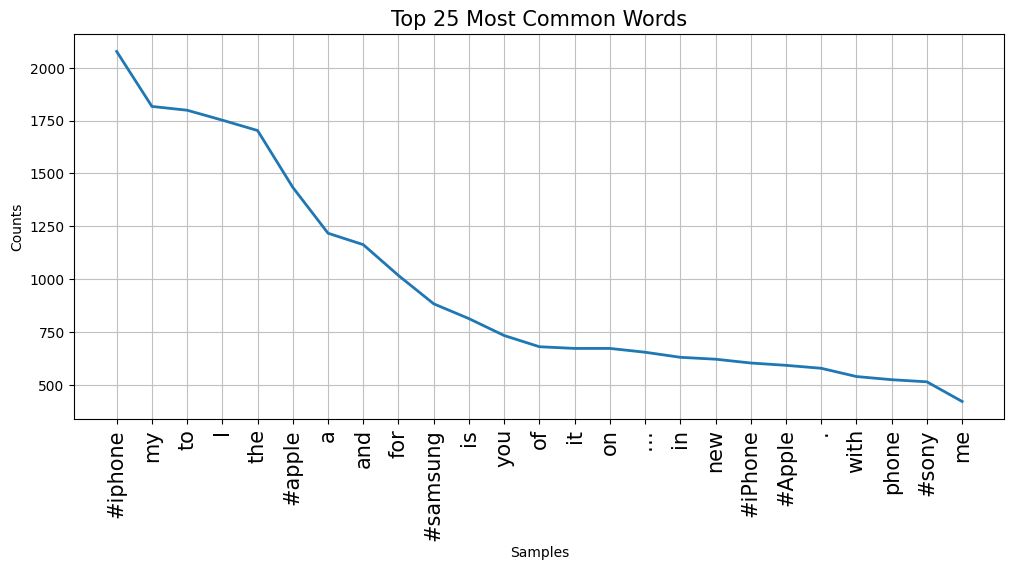

In [123]:
import matplotlib.pyplot as plt

# Frequency Distribution of the words
freq_dist = nltk.FreqDist(vocab_raw)

plt.figure(figsize=(12,5))
plt.title("Top 25 Most Common Words", fontsize=15)
plt.xticks(fontsize=15)
freq_dist.plot(25, cumulative=False)
plt.show()

In [124]:
freq_dist

FreqDist({'#iphone': 2077, 'my': 1817, 'to': 1799, 'I': 1752, 'the': 1703, '#apple': 1434, 'a': 1217, 'and': 1163, 'for': 1017, '#samsung': 883, ...})

## Freq Dist. plot for Cleaned Tweets

In [104]:
# Create a python list of all the words from all the tweets
vocab_cleaned = [token for tweet in tweets['cleaned_tweets'] for token in tweet.split()]

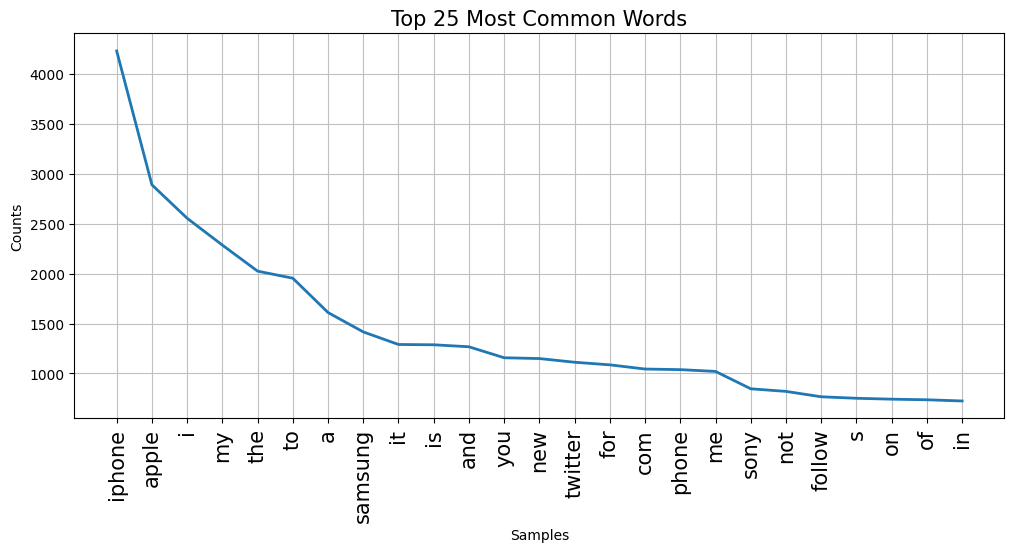

In [105]:
import matplotlib.pyplot as plt

# Frequency Distribution of the words
freq_dist = nltk.FreqDist(vocab_cleaned)

plt.figure(figsize=(12,5))
plt.title("Top 25 Most Common Words", fontsize=15)
plt.xticks(fontsize=15)
freq_dist.plot(25, cumulative=False)
plt.show()

## Freq Dist. plot for Cleaned Tweets, After removing Stopwords

In [127]:
domain_stopwords = {'twitter', 'com', 'io', 'instagram', 'rt'}
domain_stopwords

{'com', 'instagram', 'io', 'rt', 'twitter'}

In [128]:
combined_stopwords = combined_stopwords.union(domain_stopwords)
len(combined_stopwords)

383

In [136]:
def tweet_cleaner_with_stopwords(raw_tweet):
    '''
    This function cleans the raw tweet
    '''
    #Substituting contractions
    cleaned_tweet = contractions.fix(raw_tweet)

    # User-mentions Removal
    cleaned_tweet = re.sub("@[A-Za-z0-9]+", "", cleaned_tweet)

    # Hashtag Removal
    cleaned_tweet = re.sub("#", "", cleaned_tweet)

    #Hyperlink Removal
    cleaned_tweet = re.sub(r"http\S+","", cleaned_tweet)

    # Punctuation, Special Characters and digits Removal (Retaining only the alphabets)
    cleaned_tweet = re.sub(r"[^a-zA-Z]", " " , cleaned_tweet )
    
    # convert the tweet into lowercase & get rid of any leading or trailing spaces
    cleaned_tweet = cleaned_tweet.lower().strip()  

    #remove stopwords from the new_sent
    cleaned_tokens = [token for token in cleaned_tweet.split() if token not in combined_stopwords]

    # Retain only those token which have length > 2 characters
    cleaned_tokens = [token for token in cleaned_tokens if len(token)>2]
    
    new_sent = ''
    for token in cleaned_tokens:
        new_sent = new_sent + lemmatizer.lemmatize(token) + ' '

    return new_sent.strip()

In [137]:
tweet_cleaner(tweets["tweet"][63])  # without stopwords removal

'gain follower rt this must follow me i follow back follow everyone who rts gain iphone sougofollow ff i si'

In [138]:
# AFTEr the stopwords removal
tweet_cleaner_with_stopwords(tweets["tweet"][63])

'gain follower follow follow follow rts gain iphone sougofollow'

In [139]:
# Apply this cleaner function on ALL the tweets
tweets["cleaned_tweets_without_stopwords"] = tweets["tweet"].apply(tweet_cleaner_with_stopwords)
tweets.head()

,label,tweet,cleaned_tweets,cleaned_tweets_without_stopwords
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,1,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,1,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,1,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


In [140]:
# Create a python list of all the words from all the tweets
vocab_cleaned_without_stopwords = [token for tweet in tweets['cleaned_tweets_without_stopwords'] for token in tweet.split()]

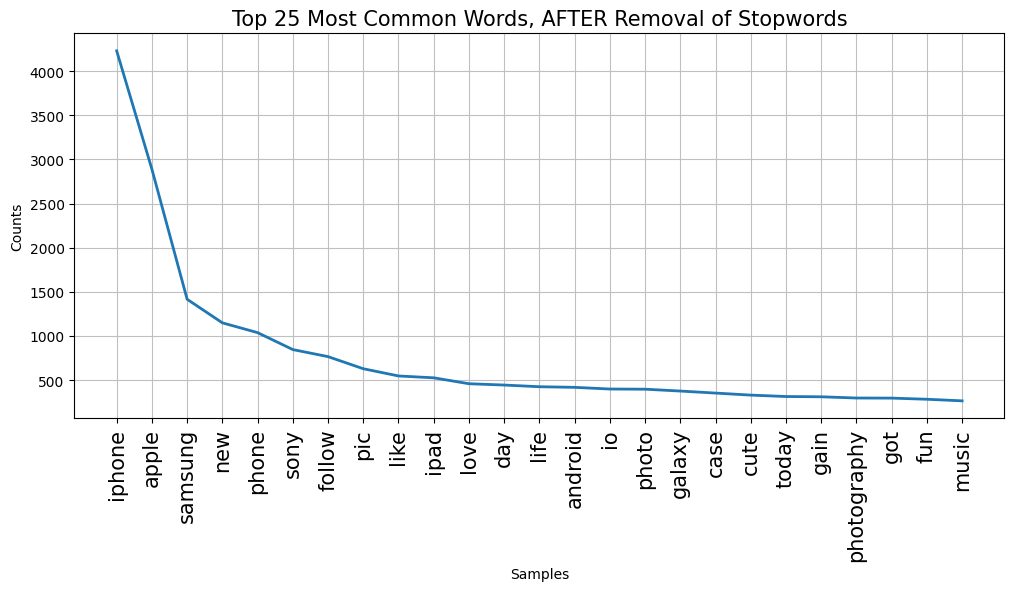

In [141]:
import matplotlib.pyplot as plt

# Frequency Distribution of the words
freq_dist = nltk.FreqDist(vocab_cleaned_without_stopwords)

plt.figure(figsize=(12,5))
plt.title("Top 25 Most Common Words, AFTER Removal of Stopwords", fontsize=15)
plt.xticks(fontsize=15)
freq_dist.plot(25, cumulative=False)
plt.show()

## Create Word Clouds for Better Visualization

In [143]:
# !pip install wordcloud pillow

In [144]:
from wordcloud import WordCloud

In [145]:
text = """Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In this tutorial, you will discover the SMOTE for oversampling imbalanced classification datasets.

After completing this tutorial, you will know:

    How the SMOTE synthesizes new examples for the minority class.
    How to correctly fit and evaluate machine learning models on SMOTE-transformed training datasets.
    How to use extensions of the SMOTE that generate synthetic examples along the class decision boundary.
"""

In [147]:
wordcloud = WordCloud(stopwords=combined_stopwords)
wordcloud.generate(text)

<function matplotlib.pyplot.show(close=None, block=None)>

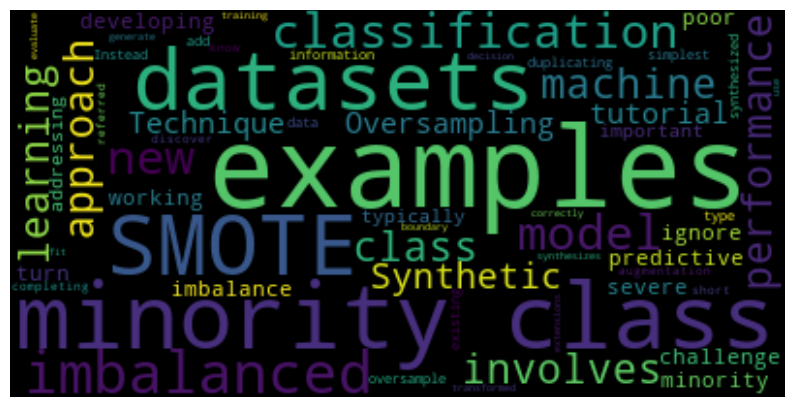

In [148]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

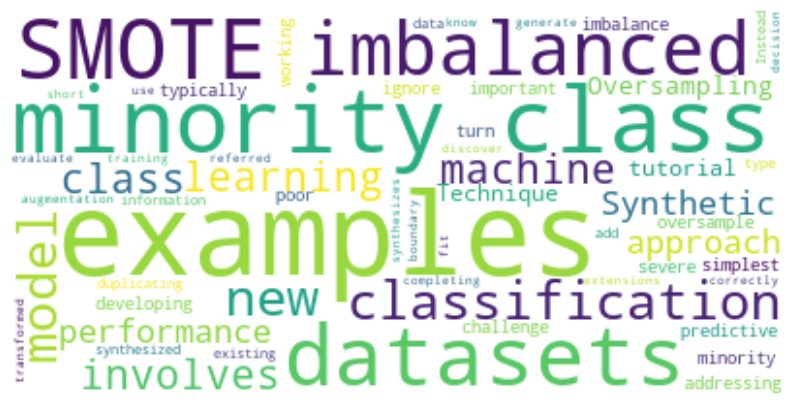

In [150]:
wordcloud = WordCloud(stopwords=combined_stopwords, background_color = "white", \
                      contour_width=3, contour_color = "steelblue")
wordcloud.generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show